In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, TargetEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier, XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import compute_class_weight
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score, f1_score, confusion_matrix, mean_absolute_error, mean_squared_error, root_mean_squared_error, classification_report,accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [3]:
df = pd.read_csv("TelecomCustomerChurn.csv")
df

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Manual,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,74.40,306.6,Yes


In [4]:
df.tail()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Manual,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7040 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isna().sum().sum()

6

In [8]:
df.dropna(inplace=True)

In [9]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7037.000000,7037.000000,7037.000000
mean,0.162285,32.376155,64.758661
std,0.368738,24.561583,30.090661
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.drop('customerID', axis=1, inplace=True)

# Visualisation

In [11]:
df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

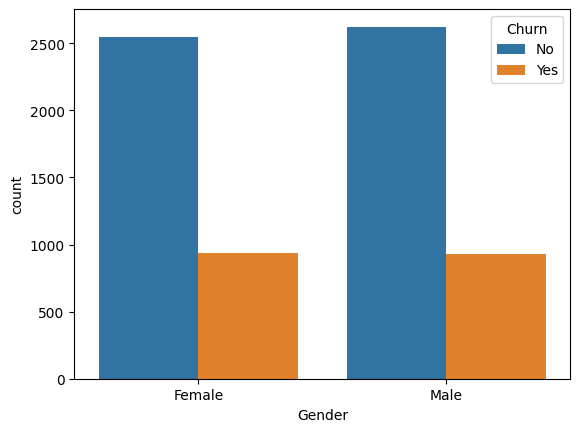

In [12]:
sns.countplot(data=df, x='Gender', hue='Churn')
plt.show()

In [13]:
df.drop("Gender", axis=1, inplace=True)

In [14]:
df.head()

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1.0,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,0,No,No,45.0,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


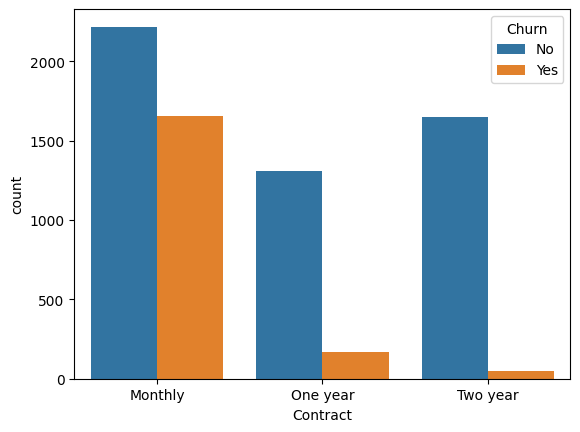

In [15]:
sns.countplot(data=df, x='Contract', hue='Churn')
plt.show()

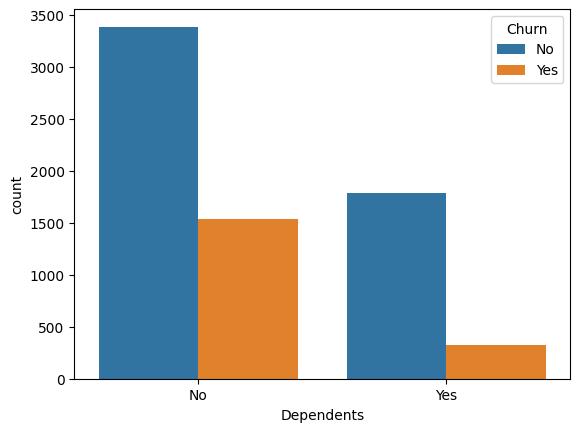

In [16]:
sns.countplot(data=df, x='Dependents', hue='Churn')
plt.show()

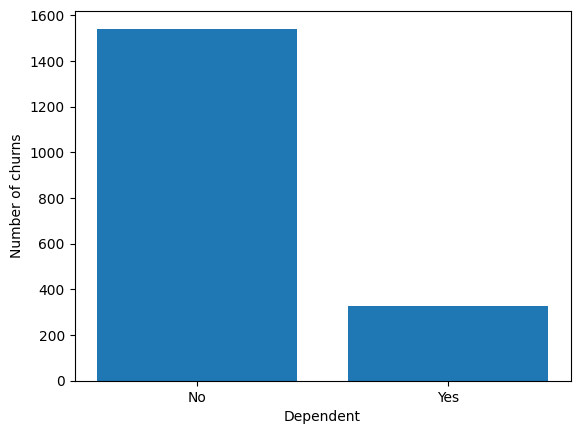

In [17]:
plt.bar(df[df['Churn'] == 'Yes']['Dependents'].value_counts().index, height=df[df['Churn'] == 'Yes']['Dependents'].value_counts().values)
plt.xlabel("Dependent")
plt.ylabel("Number of churns")
plt.show()

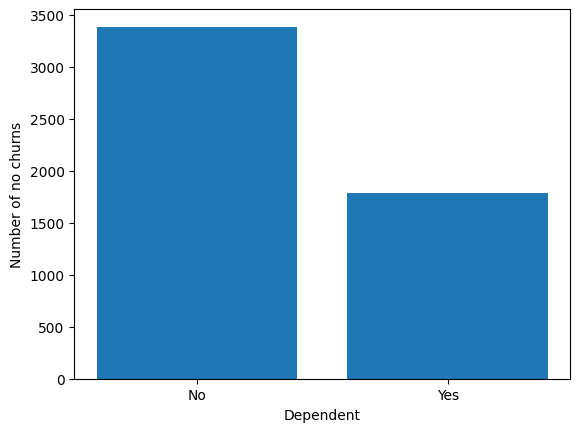

In [18]:
plt.bar(df[df['Churn'] == 'No']['Dependents'].value_counts().index, height=df[df['Churn'] == 'No']['Dependents'].value_counts().values)
plt.xlabel("Dependent")
plt.ylabel("Number of no churns")
plt.show()

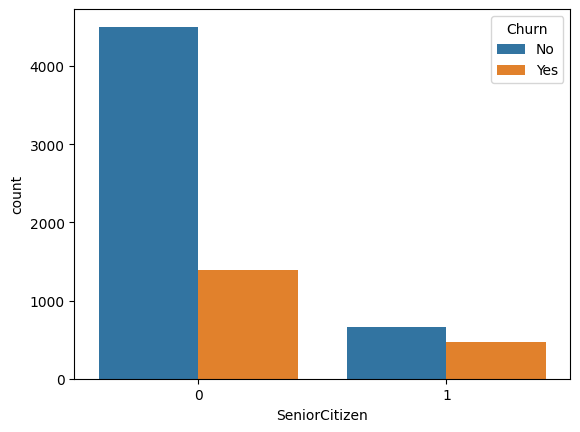

In [19]:
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.show()

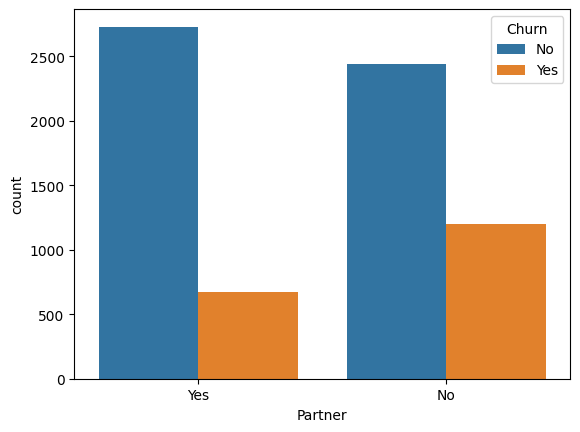

In [20]:
sns.countplot(data=df, x='Partner', hue='Churn')
plt.show()

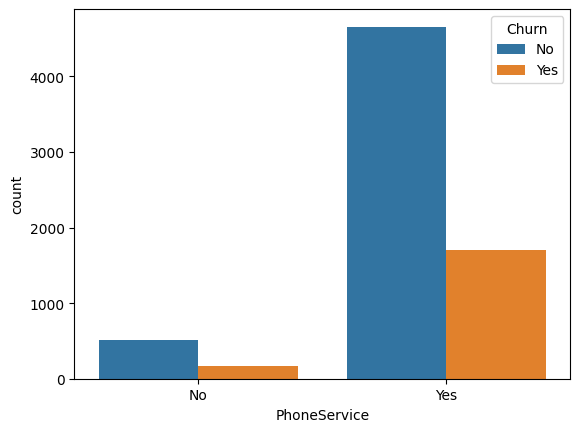

In [21]:
sns.countplot(data=df, x='PhoneService', hue='Churn')
plt.show()

<Axes: xlabel='PhoneService'>

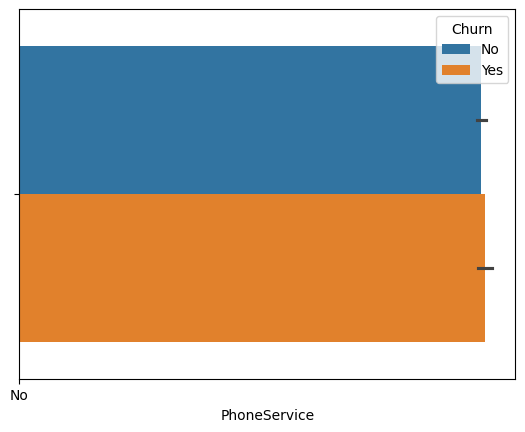

In [22]:
sns.barplot(data=df, x='PhoneService', hue='Churn')

In [23]:
df[['PhoneService', 'Churn']].value_counts()

PhoneService  Churn
Yes           No       4658
              Yes      1697
No            No        512
              Yes       170
Name: count, dtype: int64

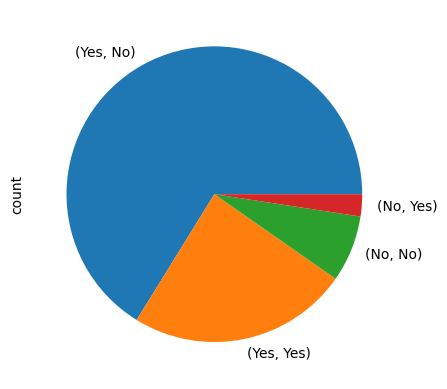

In [24]:
df[['PhoneService', 'Churn']].value_counts().plot(kind='pie', startangle = 0)
plt.show()

### I see there isn't any relation between PhoneService and churn

In [25]:
df.drop('PhoneService', axis=1, inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7037 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7037 non-null   int64  
 1   Partner           7037 non-null   object 
 2   Dependents        7037 non-null   object 
 3   Tenure            7037 non-null   float64
 4   MultipleLines     7037 non-null   object 
 5   InternetService   7037 non-null   object 
 6   OnlineSecurity    7037 non-null   object 
 7   OnlineBackup      7037 non-null   object 
 8   DeviceProtection  7037 non-null   object 
 9   TechSupport       7037 non-null   object 
 10  StreamingTV       7037 non-null   object 
 11  StreamingMovies   7037 non-null   object 
 12  Contract          7037 non-null   object 
 13  PaperlessBilling  7037 non-null   object 
 14  PaymentMethod     7037 non-null   object 
 15  MonthlyCharges    7037 non-null   float64
 16  TotalCharges      7037 non-null   object 
 17  

In [27]:
df[df['TotalCharges'] == ' ']['TotalCharges']

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [28]:
df['TotalCharges'] = df['TotalCharges'].str.strip(' ')

In [29]:
df[df['TotalCharges'] == ' ']['TotalCharges']

Series([], Name: TotalCharges, dtype: object)

In [30]:
df[df['TotalCharges'].astype(str).str.isnumeric() == False]['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 6713, dtype: object

In [31]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [32]:
df.dropna(inplace=True)

In [33]:
df['MonthsForService'] = df['TotalCharges'] / df['MonthlyCharges']

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7026 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7026 non-null   int64  
 1   Partner           7026 non-null   object 
 2   Dependents        7026 non-null   object 
 3   Tenure            7026 non-null   float64
 4   MultipleLines     7026 non-null   object 
 5   InternetService   7026 non-null   object 
 6   OnlineSecurity    7026 non-null   object 
 7   OnlineBackup      7026 non-null   object 
 8   DeviceProtection  7026 non-null   object 
 9   TechSupport       7026 non-null   object 
 10  StreamingTV       7026 non-null   object 
 11  StreamingMovies   7026 non-null   object 
 12  Contract          7026 non-null   object 
 13  PaperlessBilling  7026 non-null   object 
 14  PaymentMethod     7026 non-null   object 
 15  MonthlyCharges    7026 non-null   float64
 16  TotalCharges      7026 non-null   float64
 17  

C:\Users\elkha\AppData\Local\Temp\ipykernel_17696\3963186258.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([df[df['Churn'] == 'Yes']['TotalCharges'],df[df['Churn'] == 'No']['TotalCharges']], labels=['Yes', 'No'])


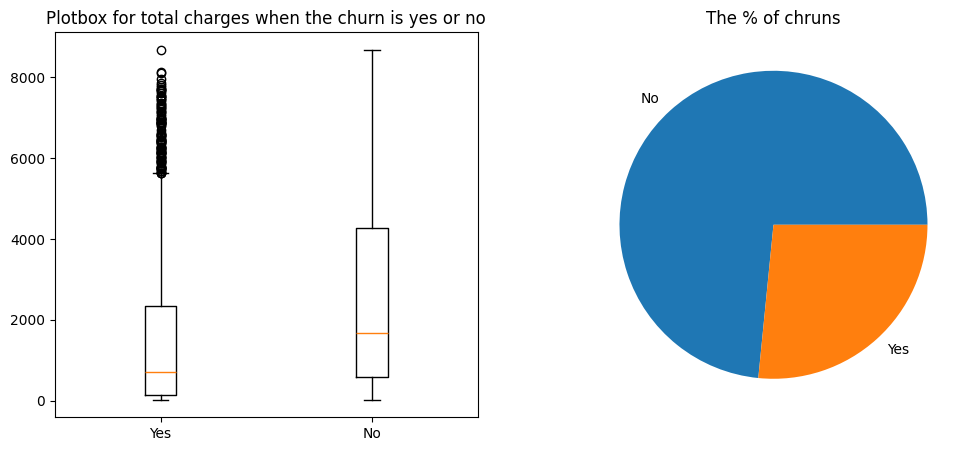

In [35]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].set_title("Plotbox for total charges when the churn is yes or no")
axes[0].boxplot([df[df['Churn'] == 'Yes']['TotalCharges'],df[df['Churn'] == 'No']['TotalCharges']], labels=['Yes', 'No'])
axes[1].set_title("The % of chruns")
axes[1].pie(df['Churn'].value_counts(), labels= df['Churn'].value_counts().index)
plt.show()

In [36]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MonthsForService'],
      dtype='object')

C:\Users\elkha\AppData\Local\Temp\ipykernel_17696\14646038.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([df[df['Churn'] == 'Yes']['MonthlyCharges'],df[df['Churn'] == 'No']['MonthlyCharges']], labels=['Yes', 'No'])


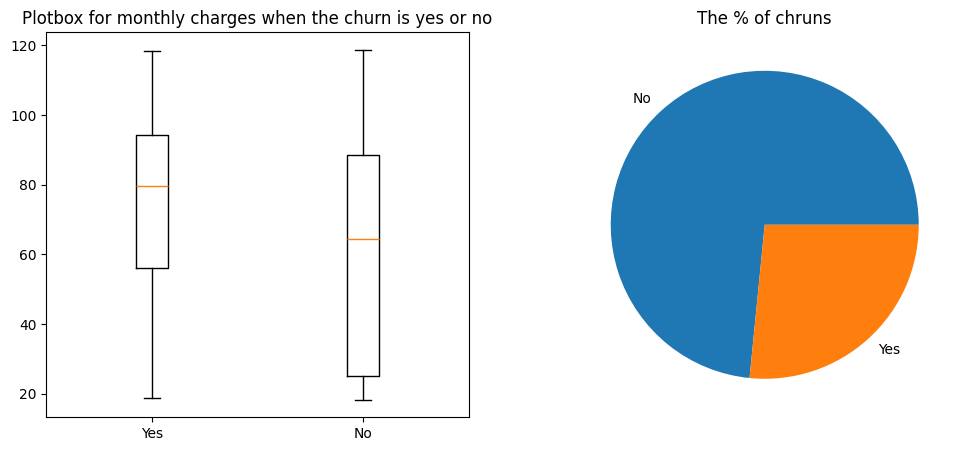

In [37]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].set_title("Plotbox for monthly charges when the churn is yes or no")
axes[0].boxplot([df[df['Churn'] == 'Yes']['MonthlyCharges'],df[df['Churn'] == 'No']['MonthlyCharges']], labels=['Yes', 'No'])
axes[1].set_title("The % of chruns")
axes[1].pie(df['Churn'].value_counts(), labels= df['Churn'].value_counts().index)
plt.show()

### I see that there isn't any relation between churns and the charges

In [38]:
df.drop(['MonthlyCharges', 'TotalCharges'], axis=1, inplace=True)

In [39]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'MonthsForService'],
      dtype='object')

C:\Users\elkha\AppData\Local\Temp\ipykernel_17696\1800263969.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Churn'] == 'Yes']['MonthsForService'],df[df['Churn'] == 'No']['MonthsForService']], labels=["Yes", "No"])


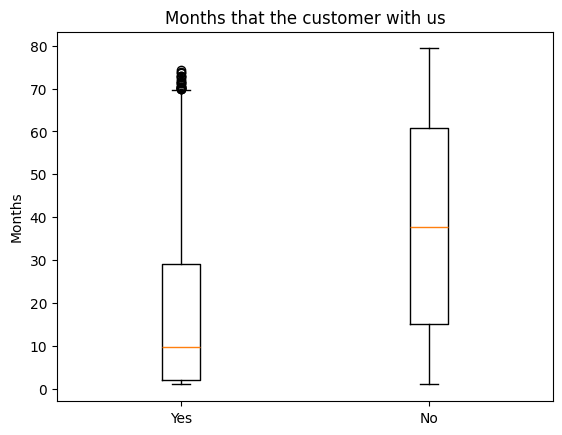

In [40]:
plt.title("Months that the customer with us")
plt.ylabel("Months")
plt.boxplot([df[df['Churn'] == 'Yes']['MonthsForService'],df[df['Churn'] == 'No']['MonthsForService']], labels=["Yes", "No"])
plt.show()

### Months that the customer with us is an important feature in decision making

In [41]:
df.head()

,SeniorCitizen,Partner,Dependents,Tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthsForService
0,0,Yes,No,1.0,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Manual,No,1.000000
1,0,No,No,34.0,No,DSL,Yes,No,Yes,No,No,No,One year,No,Manual,No,33.178227
2,0,No,No,2.0,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Manual,Yes,2.008357
3,0,No,No,45.0,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,43.516548
4,0,No,No,2.0,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Manual,Yes,2.144979


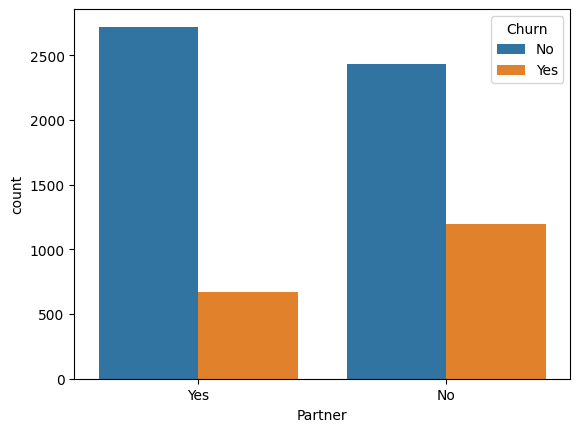

In [42]:
sns.countplot(data=df, x='Partner', hue='Churn')
plt.show()

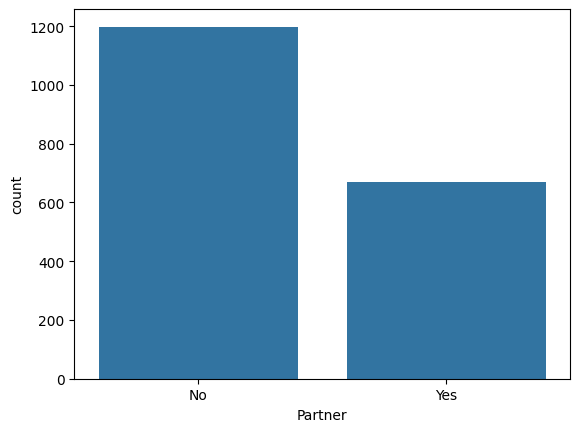

In [43]:
sns.countplot(data=df[df['Churn'] == 'Yes'], x='Partner')
plt.show()

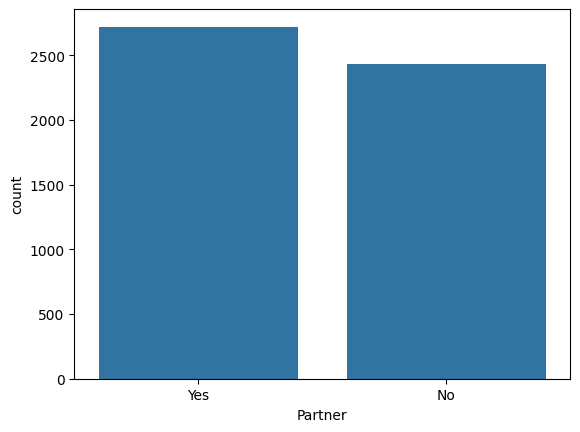

In [44]:
sns.countplot(data=df[df['Churn'] == 'No'], x='Partner')
plt.show()

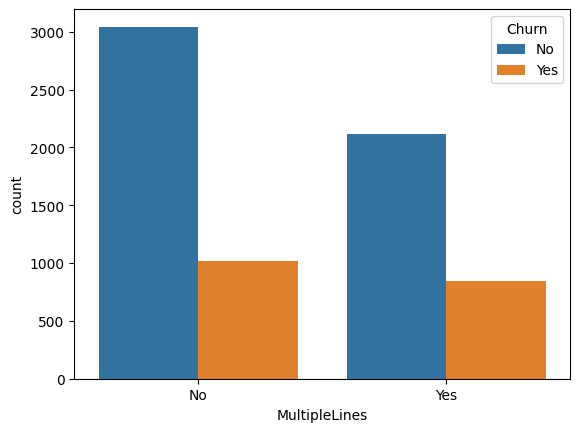

In [45]:
sns.countplot(data=df, x='MultipleLines', hue='Churn')
plt.show()

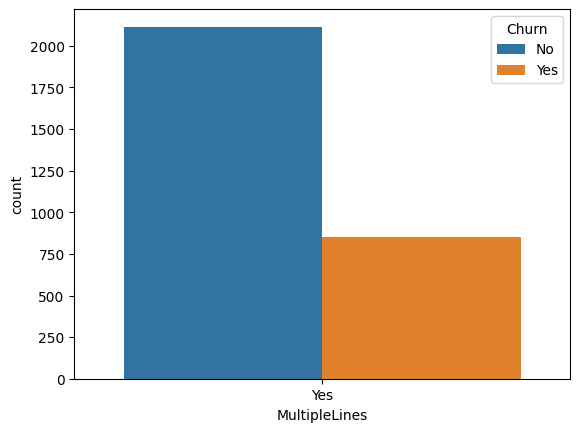

In [46]:
sns.countplot(data=df[df['MultipleLines'] == 'Yes'], x='MultipleLines', hue='Churn')
plt.show()

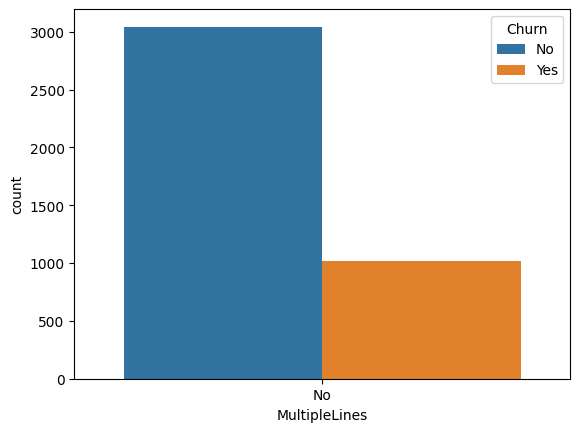

In [47]:
sns.countplot(data=df[df['MultipleLines'] == 'No'], x='MultipleLines', hue='Churn')
plt.show()

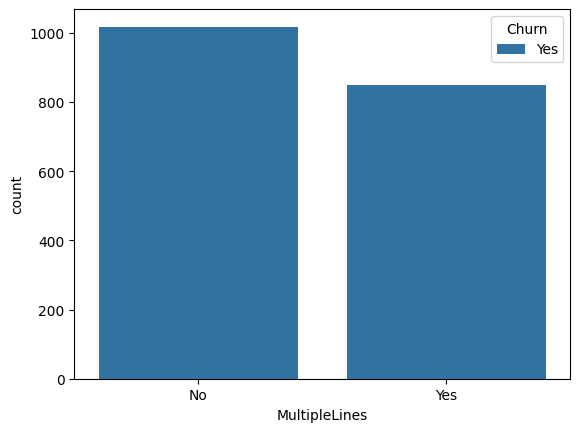

In [48]:
sns.countplot(data=df[df['Churn'] == 'Yes'], x='MultipleLines', hue='Churn')
plt.show()

In [49]:
df

,SeniorCitizen,Partner,Dependents,Tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthsForService
0,0,Yes,No,1.0,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Manual,No,1.000000
1,0,No,No,34.0,No,DSL,Yes,No,Yes,No,No,No,One year,No,Manual,No,33.178227
2,0,No,No,2.0,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Manual,Yes,2.008357
3,0,No,No,45.0,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,43.516548
4,0,No,No,2.0,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Manual,Yes,2.144979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24.0,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Manual,No,23.472877
7039,0,Yes,Yes,72.0,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No,71.345930
7040,0,Yes,Yes,11.0,No,DSL,Yes,No,No,No,No,No,Monthly,Yes,Manual,No,11.704392
7041,1,Yes,No,4.0,Yes,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Manual,Yes,4.120968


In [50]:
df[['Tenure', 'MonthsForService']]

,Tenure,MonthsForService
0,1.0,1.000000
1,34.0,33.178227
2,2.0,2.008357
3,45.0,43.516548
4,2.0,2.144979
...,...,...
7038,24.0,23.472877
7039,72.0,71.345930
7040,11.0,11.704392
7041,4.0,4.120968


In [51]:
pd.Series(df['Tenure'] - df['MonthsForService']).sort_values()

5858   -7.706941
5088   -7.407595
6778   -7.341772
4256   -7.190385
5508   -7.170974
          ...   
2338    5.691729
2151    5.935818
1277    6.017413
3122    6.792308
4038    6.941748
Length: 7026, dtype: float64

In [52]:
df['MonthsAccumilated'] = df['Tenure'] - df['MonthsForService']

C:\Users\elkha\AppData\Local\Temp\ipykernel_17696\3407020379.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Churn'] == 'Yes']['MonthsAccumilated'], df[df['Churn'] == 'No']['MonthsAccumilated']], labels=['Yes Churns', 'No Churns'])


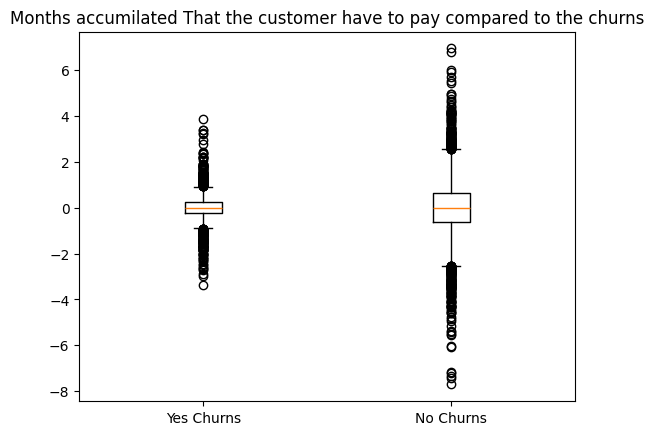

In [53]:
plt.title ("Months accumilated That the customer have to pay compared to the churns")
plt.boxplot([df[df['Churn'] == 'Yes']['MonthsAccumilated'], df[df['Churn'] == 'No']['MonthsAccumilated']], labels=['Yes Churns', 'No Churns'])
plt.show()

وادي حاجه من العبثيات اللي عملتها علشان اشوف الناس اللي عليهم شهور دفع واللي ليهم شهور يخدوها في الخدمه

والنتيجه طلعت مزريه الصراحه يعني

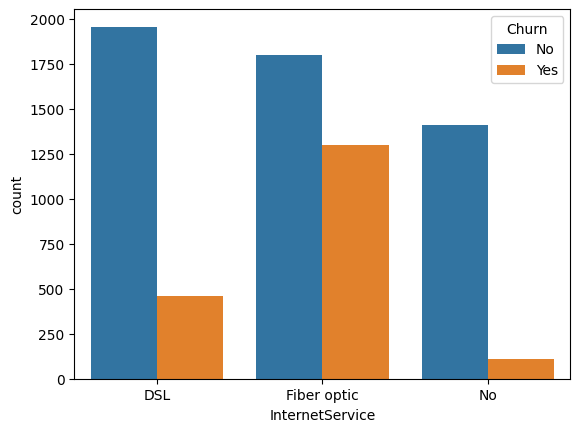

In [54]:
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.show()

### يلاهوي ازاي اللي عندهم فايبر اوبتك هما اللي يوقفوا الاشتراك
اغرب داتا بجد

انا ممكن اشك اني مش فاهم الداتا

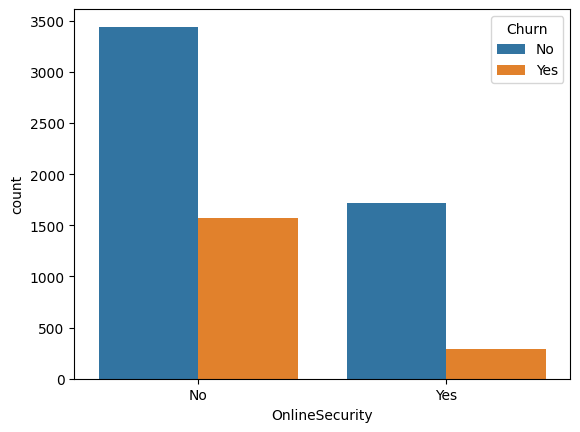

In [55]:
sns.countplot(data=df, x='OnlineSecurity', hue='Churn')
plt.show()

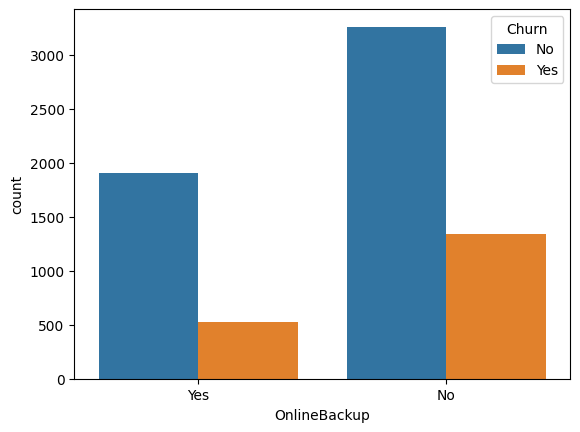

In [56]:
sns.countplot(data=df, x='OnlineBackup', hue='Churn')
plt.show()

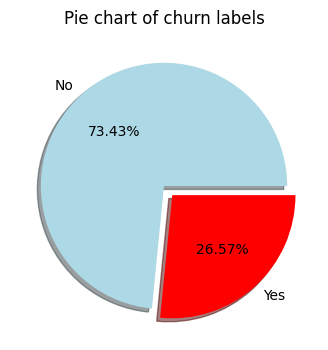

In [57]:
churn_label_count = df["Churn"].value_counts()
fig = plt.figure(figsize=(7, 4), dpi=100)
plt.pie(
    churn_label_count,
    autopct="%.2f%%",
    labels=churn_label_count.index,
    colors=["lightblue", "red"],
    explode=[0, 0.1],
    shadow=True,
)
plt.title("Pie chart of churn labels")
plt.show()

In [58]:
y = df['Churn']
x = df.drop('Churn', axis=1)

In [59]:
object_cols = x.select_dtypes(include='object').columns
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = ohe.fit_transform(x[object_cols])
encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(object_cols), index=x.index)
x = pd.concat([x.drop(columns=object_cols), encoded_df], axis=1)
x

,SeniorCitizen,Tenure,MonthsForService,MonthsAccumilated,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,MultipleLines_Yes,...,StreamingMovies_No,StreamingMovies_Yes,Contract_Monthly,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Manual
0,0,1.0,1.000000,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0,34.0,33.178227,0.821773,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,2.0,2.008357,-0.008357,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,45.0,43.516548,1.483452,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,2.0,2.144979,-0.144979,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24.0,23.472877,0.527123,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7039,0,72.0,71.345930,0.654070,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7040,0,11.0,11.704392,-0.704392,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7041,1,4.0,4.120968,-0.120968,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [60]:
le = LabelEncoder()
y = le.fit_transform(y)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
#rnd = RandomOverSampler(random_state=42, sampling_strategy='minority')
#xtrain, ytrain = rnd.fit_resample(xtrain, ytrain)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [63]:
df

,SeniorCitizen,Partner,Dependents,Tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthsForService,MonthsAccumilated
0,0,Yes,No,1.0,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Manual,No,1.000000,0.000000
1,0,No,No,34.0,No,DSL,Yes,No,Yes,No,No,No,One year,No,Manual,No,33.178227,0.821773
2,0,No,No,2.0,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Manual,Yes,2.008357,-0.008357
3,0,No,No,45.0,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,43.516548,1.483452
4,0,No,No,2.0,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Manual,Yes,2.144979,-0.144979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24.0,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Manual,No,23.472877,0.527123
7039,0,Yes,Yes,72.0,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No,71.345930,0.654070
7040,0,Yes,Yes,11.0,No,DSL,Yes,No,No,No,No,No,Monthly,Yes,Manual,No,11.704392,-0.704392
7041,1,Yes,No,4.0,Yes,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Manual,Yes,4.120968,-0.120968


In [64]:

le = LabelEncoder()
y = le.fit_transform(y)

In [65]:
from sklearn.model_selection import  cross_validate
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.utils import compute_class_weight
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN

In [66]:
AD = ADASYN(sampling_strategy='minority', random_state=42)
xtrain, ytrain = AD.fit_resample(xtrain, ytrain)

c:\Users\elkha\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\elkha\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [67]:
#imputer = IterativeImputer()
#df["TotalCharges"] = imputer.fit_transform(df[["TotalCharges"]])

In [68]:
model = {
    'log': LogisticRegression(random_state=42, solver='liblinear', C=1.0, max_iter=1000, class_weight='balanced'),
    'tre': DecisionTreeClassifier(random_state=42, max_depth=10, criterion='entropy', class_weight='balanced'),
    'rf': RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=4, criterion='entropy', class_weight='balanced'),
    'xgb': XGBClassifier(random_state=42, n_estimators=200, max_depth=7, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss'),
    'xgbrf': XGBRFClassifier(random_state=42, n_estimators=100, max_depth=7),
    'lgbm': LGBMClassifier(random_state=42, n_estimators=150, max_depth=7, learning_rate=0.1, class_weight='balanced'),
    'cat': CatBoostClassifier(random_state=42, iterations=200, depth=6, learning_rate=0.1, verbose=0, auto_class_weights='Balanced'),
    'nb': GaussianNB(),
    'knn': KNeighborsClassifier(n_neighbors=5),
    'svm': SVC(random_state=42, C=1.0, kernel='rbf', class_weight='balanced')
}

In [69]:
for name, model_instance in model.items():
  print(f"\n--- Evaluating {name} using Train-Test Split ---")
  model_instance.fit(xtrain, ytrain)
  ypred = model_instance.predict(xtest)
  print(f"\nClassification Report for {name} on Test Set:")
  print(classification_report(ytest, ypred))


--- Evaluating log using Train-Test Split ---

Classification Report for log on Test Set:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1050
           1       0.47      0.79      0.59       356

    accuracy                           0.72      1406
   macro avg       0.69      0.74      0.69      1406
weighted avg       0.80      0.72      0.74      1406


--- Evaluating tre using Train-Test Split ---

Classification Report for tre on Test Set:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1050
           1       0.48      0.71      0.57       356

    accuracy                           0.73      1406
   macro avg       0.68      0.72      0.68      1406
weighted avg       0.78      0.73      0.74      1406


--- Evaluating rf using Train-Test Split ---

Classification Report for rf on Test Set:
              precision    recall  f1-score   support

           0       0

c:\Users\elkha\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:57:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report for xgb on Test Set:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1050
           1       0.55      0.59      0.57       356

    accuracy                           0.77      1406
   macro avg       0.70      0.71      0.71      1406
weighted avg       0.78      0.77      0.78      1406


--- Evaluating xgbrf using Train-Test Split ---

Classification Report for xgbrf on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1050
           1       0.50      0.73      0.59       356

    accuracy                           0.75      1406
   macro avg       0.70      0.74      0.71      1406
weighted avg       0.79      0.75      0.76      1406


--- Evaluating lgbm using Train-Test Split ---
[LightGBM] [Info] Number of positive: 3985, number of negative: 4109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.00

c:\Users\elkha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Classification Report for lgbm on Test Set:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1050
           1       0.54      0.60      0.57       356

    accuracy                           0.77      1406
   macro avg       0.70      0.71      0.70      1406
weighted avg       0.78      0.77      0.77      1406


--- Evaluating cat using Train-Test Split ---

Classification Report for cat on Test Set:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1050
           1       0.55      0.61      0.58       356

    accuracy                           0.78      1406
   macro avg       0.71      0.72      0.72      1406
weighted avg       0.79      0.78      0.78      1406


--- Evaluating nb using Train-Test Split ---

Classification Report for nb on Test Set:
              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1050
           1

In [70]:
param = {
    'log': {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    'tre': {'max_depth': [None, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'rf': {'n_estimators': [50, 100, 200], 'max_depth': [None,15],
           'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'xgb': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]},
    'xgbrf': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    'lgbm': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]},
    'cat': {'depth': [4, 6, 8]

            , 'learning_rate': [0.01, 0.1, 0.2],'iterations': [100,200,300]},
    'nb': {},
    'knn': {'n_neighbors': [3, 5, 7]},
}

In [71]:
catparam = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'iterations': [100, 200, 300]}

In [72]:
#gd = GridSearchCV(CatBoostClassifier(), catparam, cv=5, scoring='f1')
#gd.fit(xtrain, ytrain)
#gd.best_params_

In [73]:
# xtrain, ytrain = SMOTE(random_state=42, sampling_strategy='majority').fit_resample(xtrain, ytrain)

In [74]:
# model = CatBoostClassifier(random_state=42, iterations=100, depth=8, learning_rate=0.1, verbose=0)
# model.fit(xtrain, ytrain)
# ypred = model.predict(xtest)
# print(classification_report(ytest, ypred))

In [75]:
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import classification_report

# for name, model_instance in model.items():
#     print(f"\n--- Evaluating {name} ---")

#     cv_results = cross_validate(
#         model_instance,
#         xtrain,
#         ytrain,
#         cv=5,
#         scoring='accuracy'
#     )

#     print(f"Average cross-validation accuracy for {name}: {cv_results['test_score'].mean():.4f}")

#     model_instance.fit(xtrain, ytrain)
#     ypred = model_instance.predict(xtest)

#     print(f"\nClassification Report for {name} on Test Set:")
#     print(classification_report(ytest, ypred))


In [76]:
from sklearn.model_selection import cross_validate

def run_cross_validation(model, X, y, cv=5, scoring='accuracy', model_name='Model'):
    print(f'--- Performing {cv}-fold cross-validation for {model_name} ---')
    cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=True)
    return cv_results

In [77]:
weights = {i: j for i, j in zip(np.unique(ytrain), compute_class_weight(class_weight='balanced', classes=np.unique(ytrain), y=ytrain))}

In [78]:
tuned_models = {}

models_to_tune = ['log', 'lgbm', 'xgb', 'cat']

for name in models_to_tune:
    print(f"\n--- Tuning {name} ---")
    estimator = model[name]
    param_grid = param[name]

    grid_search = GridSearchCV(estimator=estimator,
                                 param_grid=param_grid,
                                 cv=5,
                                 scoring='f1',
                                 n_jobs=-1,
                                 verbose=1)


    grid_search.fit(xtrain, ytrain)

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best F1-score for {name}: {grid_search.best_score_:.4f}")

    tuned_models[name] = grid_search.best_estimator_
    ypred = tuned_models[name].predict(xtest)
    print(f"\nClassification Report for Tuned {name} on Test Set:")
    print(classification_report(ytest, ypred))


--- Tuning log ---
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best parameters for log: {'C': 0.001, 'penalty': 'l2'}
Best F1-score for log: 0.7586

Classification Report for Tuned log on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1050
           1       0.44      0.83      0.58       356

    accuracy                           0.69      1406
   macro avg       0.68      0.74      0.67      1406
weighted avg       0.80      0.69      0.71      1406


--- Tuning lgbm ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Number of positive: 3985, number of negative: 4109
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001811 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3131
[LightGBM] [Info] Number of data points in the train set: 8094, number of used features: 33
[LightGBM] [Info]

c:\Users\elkha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\elkha\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:58:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters for xgb: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best F1-score for xgb: 0.8261

Classification Report for Tuned xgb on Test Set:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1050
           1       0.53      0.64      0.58       356

    accuracy                           0.77      1406
   macro avg       0.70      0.72      0.71      1406
weighted avg       0.78      0.77      0.77      1406


--- Tuning cat ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for cat: {'depth': 8, 'iterations': 100, 'learning_rate': 0.1}
Best F1-score for cat: 0.8280

Classification Report for Tuned cat on Test Set:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1050
           1       0.53      0.63      0.58       356

    accuracy                           0.77      1406
   macro avg       0.70      0.72      0.71      

**Reasoning**:
The previous code executed successfully, performing hyperparameter tuning with GridSearchCV for the specified models and providing the best parameters, F1-scores, and classification reports. No errors were encountered that require code modification. I will regenerate the code as it is the last step of the current subtask.



In [79]:
tuned_models = {}

models_to_tune = ['log', 'lgbm', 'xgb', 'cat']

for name in models_to_tune:
    print(f"\n--- Tuning {name} ---")
    estimator = model[name]
    param_grid = param[name]

    # Instantiate GridSearchCV
    grid_search = GridSearchCV(estimator=estimator,
                                 param_grid=param_grid,
                                 cv=5,
                                 scoring='f1',
                                 n_jobs=-1,
                                 verbose=1)


    grid_search.fit(xtrain, ytrain)


    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best F1-score for {name}: {grid_search.best_score_:.4f}")

    tuned_models[name] = grid_search.best_estimator_

    ypred = tuned_models[name].predict(xtest)
    print(f"\nClassification Report for Tuned {name} on Test Set:")
    print(classification_report(ytest, ypred))


--- Tuning log ---
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best parameters for log: {'C': 0.001, 'penalty': 'l2'}
Best F1-score for log: 0.7586

Classification Report for Tuned log on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1050
           1       0.44      0.83      0.58       356

    accuracy                           0.69      1406
   macro avg       0.68      0.74      0.67      1406
weighted avg       0.80      0.69      0.71      1406


--- Tuning lgbm ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Number of positive: 3985, number of negative: 4109
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001821 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3131
[LightGBM] [Info] Number of data points in the train set: 8094, number of used features: 33
[LightGBM] [Info]

c:\Users\elkha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\elkha\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:02:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters for xgb: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best F1-score for xgb: 0.8261

Classification Report for Tuned xgb on Test Set:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1050
           1       0.53      0.64      0.58       356

    accuracy                           0.77      1406
   macro avg       0.70      0.72      0.71      1406
weighted avg       0.78      0.77      0.77      1406


--- Tuning cat ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for cat: {'depth': 8, 'iterations': 100, 'learning_rate': 0.1}
Best F1-score for cat: 0.8280

Classification Report for Tuned cat on Test Set:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1050
           1       0.53      0.63      0.58       356

    accuracy                           0.77      1406
   macro avg       0.70      0.72      0.71      

In [ ]:
tuned_models = {}

# List of models to tune
models_to_tune = ['log', 'lgbm', 'xgb', 'cat']

for name in models_to_tune:
    print(f"\n--- Tuning {name} ---")
    estimator = model[name]
    param_grid = param[name]

    # Instantiate GridSearchCV
    grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
    grid_search.fit(xtrain, ytrain)

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best F1-score for {name}: {grid_search.best_score_:.4f}")

    tuned_models[name] = grid_search.best_estimator_

    ypred = tuned_models[name].predict(xtest)
    print(f"\nClassification Report for Tuned {name} on Test Set:")
    print(classification_report(ytest, ypred))


--- Tuning log ---
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best parameters for log: {'C': 0.001, 'penalty': 'l2'}
Best F1-score for log: 0.7586

Classification Report for Tuned log on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1050
           1       0.44      0.83      0.58       356

    accuracy                           0.69      1406
   macro avg       0.68      0.74      0.67      1406
weighted avg       0.80      0.69      0.71      1406


--- Tuning lgbm ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Number of positive: 3985, number of negative: 4109
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001931 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3131
[LightGBM] [Info] Number of data points in the train set: 8094, number of used features: 33
[LightGBM] [Info]

c:\Users\elkha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\elkha\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:06:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters for xgb: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best F1-score for xgb: 0.8261

Classification Report for Tuned xgb on Test Set:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1050
           1       0.53      0.64      0.58       356

    accuracy                           0.77      1406
   macro avg       0.70      0.72      0.71      1406
weighted avg       0.78      0.77      0.77      1406


--- Tuning cat ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for cat: {'depth': 8, 'iterations': 100, 'learning_rate': 0.1}
Best F1-score for cat: 0.8280

Classification Report for Tuned cat on Test Set:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1050
           1       0.53      0.63      0.58       356

    accuracy                           0.77      1406
   macro avg       0.70      0.72      0.71      

In [81]:
import joblib

# Save the best performing XGBoost model
joblib.dump(tuned_models['xgb'], 'best_xgboost_model.joblib')
print("Best XGBoost model saved to 'best_xgboost_model.joblib'")

Best XGBoost model saved to 'best_xgboost_model.joblib'


In [101]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses , optimizers , metrics
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [102]:
model = keras.models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=xtrain.shape[1:]))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 16)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 721 (2.82 KB)

 Trainable params: 721 (2.82 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
es = EarlyStopping(monitor = 'val_loss', patience = 3, verbose= 1)

In [104]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [105]:
model.fit(xtrain, ytrain, batch_size=64, epochs=120, callbacks=[es])

Epoch 1/120
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4994 - loss: 0.7050
Epoch 2/120
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6945 - loss: 0.5933
Epoch 3/120
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7449 - loss: 0.5321
Epoch 4/120
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7579 - loss: 0.5050
Epoch 5/120
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7625 - loss: 0.5031
Epoch 6/120
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7610 - loss: 0.4936
Epoch 7/120
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7641 - loss: 0.4917
Epoch 8/120
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7614 - loss: 0.4905
Epoch 9/120
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7748 - loss: 0.4747
Epoch 10/120
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7706 - loss: 0.4753
Epoch 11/120
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7709 - loss: 0.4829
Epoch 12/120
127/127 ━━━━━━━━━━━━━━━━━━━━

In [106]:
model.evaluate(xtest, ytest)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7088 - loss: 0.6775


[0.6719853281974792, 0.7062588930130005]

In [ ]:
from sklearn.datasets import make_classification, fetch_california_housing
from sklearn.ensemble import HistGradientBoostingClassifier